In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame

In [2]:
path = '/home/mehul/Documents/lectures/python/data/facebook_logs/facebook_login_logout_logs'
columns=['username','date','time','action']
data = pd.read_csv(path, names=columns, header=None)
data

,username,date,time,action
0,mehul.chopra@neebal.com,2015-03-01,4:30,in
1,narendra.modi@yahoo.com,2015-03-01,4:35,out
2,katrina.kaif@gmail.com,2015-03-01,4:36,out
3,mehul.chopra@neebal.com,2015-03-01,4:45,out
4,narendra.modi@yahoo.com,2015-03-01,4:50,out
5,mehul.chopra@neebal.com,2015-03-02,5:30,out
6,mehul.chopra@neebal.com,2015-03-02,5:45,out
7,mehul.chopra@neebal.com,2015-03-02,6:00,in
8,mehul.chopra@neebal.com,2015-03-02,7:30,out
9,katrina.kaif@gmail.com,2015-03-02,18:00,out


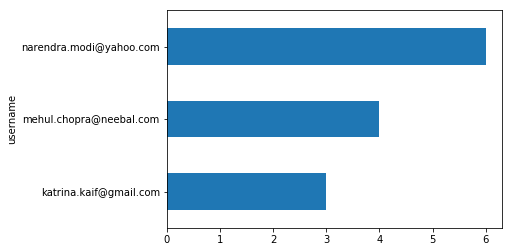

In [6]:
p_data = data[data['action'] == 'out']
g_data = p_data.groupby('username')
g_data['action'].count().plot(kind='barh')
plt.show()

In [10]:
p_data['count'] = 1
p_data
# p_data.pivot_table('action', aggfunc=np.count_nonzero, index=['username'])

/home/mehul/lib/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,username,date,time,action,count
1,narendra.modi@yahoo.com,2015-03-01,4:35,out,1
2,katrina.kaif@gmail.com,2015-03-01,4:36,out,1
3,mehul.chopra@neebal.com,2015-03-01,4:45,out,1
4,narendra.modi@yahoo.com,2015-03-01,4:50,out,1
5,mehul.chopra@neebal.com,2015-03-02,5:30,out,1
6,mehul.chopra@neebal.com,2015-03-02,5:45,out,1
8,mehul.chopra@neebal.com,2015-03-02,7:30,out,1
9,katrina.kaif@gmail.com,2015-03-02,18:00,out,1
10,narendra.modi@yahoo.com,2015-03-03,10:30,out,1
11,narendra.modi@yahoo.com,2015-03-03,10:45,out,1


In [11]:
p_data.pivot_table('count', aggfunc=np.sum, index='username')

,count
username,
katrina.kaif@gmail.com,3
mehul.chopra@neebal.com,4
narendra.modi@yahoo.com,6


In [12]:
p_data

,username,date,time,action,count
1,narendra.modi@yahoo.com,2015-03-01,4:35,out,1
2,katrina.kaif@gmail.com,2015-03-01,4:36,out,1
3,mehul.chopra@neebal.com,2015-03-01,4:45,out,1
4,narendra.modi@yahoo.com,2015-03-01,4:50,out,1
5,mehul.chopra@neebal.com,2015-03-02,5:30,out,1
6,mehul.chopra@neebal.com,2015-03-02,5:45,out,1
8,mehul.chopra@neebal.com,2015-03-02,7:30,out,1
9,katrina.kaif@gmail.com,2015-03-02,18:00,out,1
10,narendra.modi@yahoo.com,2015-03-03,10:30,out,1
11,narendra.modi@yahoo.com,2015-03-03,10:45,out,1


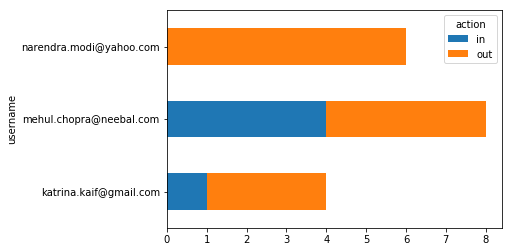

In [20]:
data['count'] = 1
ins_outs = data[['username','action','count']]
username_action = ins_outs.pivot_table('count', aggfunc=np.sum, index='username', columns='action')
c_data = username_action.fillna(0)
c_data.plot(kind='barh', stacked=True)

plt.show()